In [42]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
%matplotlib inline

In [43]:
raw_data = pd.read_csv('svmtest.csv')
raw_data.tail()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
3665,Chocolate Cupcakes with Butterscotch Icing,3.125,146.0,2.0,8.0,62.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3666,"Mushroom, Radish, and Bibb Lettuce Salad with ...",3.125,178.0,3.0,16.0,317.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3667,Chopped Salad,4.375,309.0,2.0,30.0,885.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3668,Plum-Glazed Turkey,5.000,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3669,Mocha Muffins with Chocolate Chips and Pecans,4.375,429.0,6.0,24.0,382.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


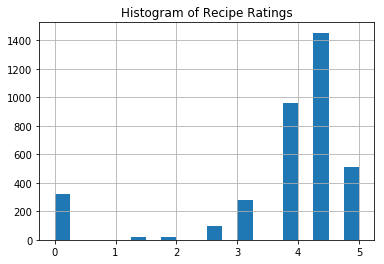

In [44]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [45]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    747
protein     753
fat         758
sodium      748
dtype: int64

In [46]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
svr.score(X, Y)

-0.018605587418357272

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.05425375, -0.00845367, -0.0435314 , -0.07015603, -0.03768809])

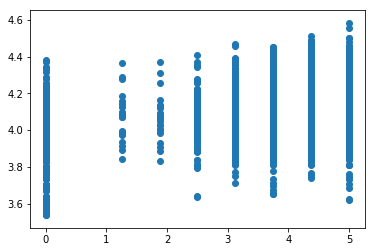

In [49]:
plt.scatter(Y, svr.predict(X))

In [57]:
## We have more than 700s null data, I ran the command below to remove those to have a more decrete data.

In [58]:
raw_data = raw_data.dropna()

In [59]:
## setting Y1 with the new rating data without isnull. 

In [51]:
Y1 = raw_data.rating

In [ ]:
## drop Title since it do not give numeric data, and rating since we are using it as a base. 

In [52]:
X1 = raw_data.drop(['title', 'rating'], 1)

In [53]:
svr.fit(X1,Y1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
## We can see an increase in our score and also an increase in our cross validation score as well.

In [54]:
svr.score(X1, Y1) 

0.25472510749511845

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X1, Y1, cv=5)

array([-0.0936224 , -0.10860377, -0.06740911, -0.09043586, -0.03324883])

In [ ]:
## Graph still look the same as before. 

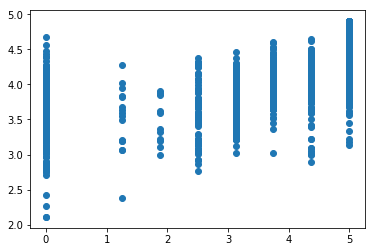

In [56]:
plt.scatter(Y1, svr.predict(X1))

In [76]:
## We use ensemble and changing our rating to binary; anything greater than 3 is 1 (good), less is 0 (bad).

In [61]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

In [69]:
#Python RFC requires numerical predictors, and is complaining that raw_data['rating'] is continuous, so 
#per the challenge requirement, I will convert the rating into a 'good / bad' 1/0 scale where anything above 3.75 is good

Y2 = raw_data['rating'].apply(lambda x: 1 if x >= 3 else 0)

In [71]:
## setting the rating to binary and using ensemble classifier helps increase the accuracy alot!
cross_val_score(rfc, X1, Y2, cv=5)

array([0.87993139, 0.89003436, 0.86597938, 0.88659794, 0.88123924])

In [77]:
## We now will use the top 30 features to hopefully, increase our accuracy even further.

In [80]:
df = pd.DataFrame()
df['percentage']= rfc.fit(X1, Y2).feature_importances_
df['features'] = X1.columns

In [82]:
df2 = df.sort_values(by='percentage', ascending=False)

In [83]:
df2.head()

,percentage,features
3,0.059580,sodium
2,0.057051,fat
0,0.052253,calories
1,0.049669,protein
244,0.016378,gourmet


In [84]:
important_features = df2['features'].iloc[0:30]

In [85]:
important_features

3                     sodium
2                        fat
0                   calories
1                    protein
244                  gourmet
61               bon appétit
190                    drink
665                   winter
506             quick & easy
123             chile pepper
640               vegetarian
36                      bake
601                   summer
457              peanut free
148         condiment/spread
546                    sauce
281           house & garden
239                      gin
658        wheat/gluten-free
9      advance prep required
573                soup/stew
625                   tomato
314                   kosher
232                    fruit
208                     fall
271                     herb
409           no sugar added
578                 soy free
444                  parsley
240                   ginger
Name: features, dtype: object

In [87]:
important_features = important_features.tolist()

In [88]:
important_features

['sodium',
 'fat',
 'calories',
 'protein',
 'gourmet',
 'bon appétit',
 'drink',
 'winter',
 'quick & easy',
 'chile pepper',
 'vegetarian',
 'bake',
 'summer',
 'peanut free',
 'condiment/spread',
 'sauce',
 'house & garden',
 'gin',
 'wheat/gluten-free',
 'advance prep required',
 'soup/stew',
 'tomato',
 'kosher',
 'fruit',
 'fall',
 'herb',
 'no sugar added',
 'soy free',
 'parsley',
 'ginger']

In [91]:
df_new = pd.DataFrame()

In [92]:
df_new[important_features] = X1[important_features]

In [101]:
Y2 = raw_data['rating'].apply(lambda x: 1 if x >= 3 else 0)

In [104]:
from sklearn.svm import SVC
svc = SVC()

In [105]:
svc.fit(df_new, Y2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
svc.score(df_new, Y2)

0.9766323024054983

In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, df_new, Y2, cv=5)

array([0.88679245, 0.88831615, 0.88316151, 0.8814433 , 0.88123924])

## By selecting the top 30 features in our database, and data cleansing. We have improved our accuracy to 98%, at the same time making our cross validation to have a very high score with barely any fluation. 